# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# **Get Data**

###Import data from github

In [2]:
scraping_data = pd.read_csv('https://raw.githubusercontent.com/akbarsigit/airflow-DataEngineeringPipeline/main/data/tweet_scraper.csv')

###Filtering data by USA-based location

Collection data of country and city in USA

In [3]:
usa_country = ["us","usa","united states","New York", "Buffalo", "Rochester", "Yonkers", "Syracuse", "Albany", "New Rochelle", "Mount Vernon", "Schenectady", "Utica", "White Plains", "Hempstead", "Troy", "Niagara Falls", "Binghamton", "Freeport", "Valley Stream", "Los Angeles", "San Diego", "San Jose", "San Francisco", "Fresno", "Sacramento", "Long Beach", "Oakland", "Bakersfield", "Anaheim", "Santa Ana", "Riverside", "Stockton", "Chula Vista", "Irvine", "Fremont", "San Bernardino", "Modesto", "Fontana", "Oxnard", "Moreno Valley", "Huntington Beach", "Glendale", "Santa Clarita", "Garden Grove", "Oceanside", "Rancho Cucamonga", "Santa Rosa", "Ontario", "Lancaster", "Elk Grove", "Corona", "Palmdale", "Salinas", "Pomona", "Hayward", "Escondido", "Torrance", "Sunnyvale", "Orange", "Fullerton", "Pasadena", "Thousand Oaks", "Visalia", "Simi Valley", "Concord", "Roseville", "Victorville", "Santa Clara", "Vallejo", "Berkeley", "El Monte", "Downey", "Costa Mesa", "Inglewood", "Carlsbad", "San Buenaventura (Ventura)", "Fairfield", "West Covina", "Murrieta", "Richmond", "Norwalk", "Antioch", "Temecula", "Burbank", "Daly City", "Rialto", "Santa Maria", "El Cajon", "San Mateo", "Clovis", "Compton", "Jurupa Valley", "Vista", "South Gate", "Mission Viejo", "Vacaville", "Carson", "Hesperia", "Santa Monica", "Westminster", "Redding", "Santa Barbara", "Chico", "Newport Beach", "San Leandro", "San Marcos", "Whittier", "Hawthorne", "Citrus Heights", "Tracy", "Alhambra", "Livermore", "Buena Park", "Menifee", "Hemet", "Lakewood", "Merced", "Chino", "Indio", "Redwood City", "Lake Forest", "Napa", "Tustin", "Bellflower", "Mountain View", "Chino Hills", "Baldwin Park", "Alameda", "Upland", "San Ramon", "Folsom", "Pleasanton", "Union City", "Perris", "Manteca", "Lynwood", "Apple Valley", "Redlands", "Turlock", "Milpitas", "Redondo Beach", "Rancho Cordova", "Yorba Linda", "Palo Alto", "Davis", "Camarillo", "Walnut Creek", "Pittsburg", "South San Francisco", "Yuba City", "San Clemente", "Laguna Niguel", "Pico Rivera", "Montebello", "Lodi", "Madera", "Santa Cruz", "La Habra", "Encinitas", "Monterey Park", "Tulare", "Cupertino", "Gardena", "National City", "Rocklin", "Petaluma", "Huntington Park", "San Rafael", "La Mesa", "Arcadia", "Fountain Valley", "Diamond Bar", "Woodland", "Santee", "Lake Elsinore", "Porterville", "Paramount", "Eastvale", "Rosemead", "Hanford", "Highland", "Brentwood", "Novato", "Colton", "Cathedral City", "Delano", "Yucaipa", "Watsonville", "Placentia", "Glendora", "Gilroy", "Palm Desert", "Cerritos", "West Sacramento", "Aliso Viejo", "Poway", "La Mirada", "Rancho Santa Margarita", "Cypress", "Dublin", "Covina", "Azusa", "Palm Springs", "San Luis Obispo", "Ceres", "San Jacinto", "Lincoln", "Newark", "Lompoc", "El Centro", "Danville", "Bell Gardens", "Coachella", "Rancho Palos Verdes", "San Bruno", "Rohnert Park", "Brea", "La Puente", "Campbell", "San Gabriel", "Beaumont", "Morgan Hill", "Culver City", "Calexico", "Stanton", "La Quinta", "Pacifica", "Montclair", "Oakley", "Monrovia", "Los Banos", "Martinez", "Chicago", "Aurora", "Rockford", "Joliet", "Naperville", "Springfield", "Peoria", "Elgin", "Waukegan", "Cicero", "Champaign", "Bloomington", "Arlington Heights", "Evanston", "Decatur", "Schaumburg", "Bolingbrook", "Palatine", "Skokie", "Des Plaines", "Orland Park", "Tinley Park", "Oak Lawn", "Berwyn", "Mount Prospect", "Normal", "Wheaton", "Hoffman Estates", "Oak Park", "Downers Grove", "Elmhurst", "Glenview", "DeKalb", "Lombard", "Belleville", "Moline", "Buffalo Grove", "Bartlett", "Urbana", "Quincy", "Crystal Lake", "Plainfield", "Streamwood", "Carol Stream", "Romeoville", "Rock Island", "Hanover Park", "Carpentersville", "Wheeling", "Park Ridge", "Addison", "Calumet City", "Houston", "San Antonio", "Dallas", "Austin", "Fort Worth", "El Paso", "Arlington", "Corpus Christi", "Plano", "Laredo", "Lubbock", "Garland", "Irving", "Amarillo", "Grand Prairie", "Brownsville", "Pasadena", "McKinney", "Mesquite", "McAllen", "Killeen", "Frisco", "Waco", "Carrollton", "Denton", "Midland", "Abilene", "Beaumont", "Round Rock", "Odessa", "Wichita Falls", "Richardson", "Lewisville", "Tyler", "College Station", "Pearland", "San Angelo", "Allen", "League City", "Sugar Land", "Longview", "Edinburg", "Mission", "Bryan", "Baytown", "Pharr", "Temple", "Missouri City", "Flower Mound", "Harlingen", "North Richland Hills", "Victoria", "Conroe", "New Braunfels", "Mansfield", "Cedar Park", "Rowlett", "Port Arthur", "Euless", "Georgetown", "Pflugerville", "DeSoto", "San Marcos", "Grapevine", "Bedford", "Galveston", "Cedar Hill", "Texas City", "Wylie", "Haltom City", "Keller", "Coppell", "Rockwall", "Huntsville", "Duncanville", "Sherman", "The Colony", "Burleson", "Hurst", "Lancaster", "Texarkana", "Friendswood", "Weslaco", "Philadelphia", "Pittsburgh", "Allentown", "Erie", "Reading", "Scranton", "Bethlehem", "Lancaster", "Harrisburg", "Altoona", "York", "State College", "Wilkes-Barre", "Phoenix", "Tucson", "Mesa", "Chandler", "Glendale", "Scottsdale", "Gilbert", "Tempe", "Peoria", "Surprise", "Yuma", "Avondale", "Goodyear", "Flagstaff", "Buckeye", "Lake Havasu City", "Casa Grande", "Sierra Vista", "Maricopa", "Oro Valley", "Prescott", "Bullhead City", "Prescott Valley", "Marana", "Apache Junction", "Jacksonville", "Miami", "Tampa", "Orlando", "St. Petersburg", "Hialeah", "Tallahassee", "Fort Lauderdale", "Port St. Lucie", "Cape Coral", "Pembroke Pines", "Hollywood", "Miramar", "Gainesville", "Coral Springs", "Miami Gardens", "Clearwater", "Palm Bay", "Pompano Beach", "West Palm Beach", "Lakeland", "Davie", "Miami Beach", "Sunrise", "Plantation", "Boca Raton", "Deltona", "Largo", "Deerfield Beach", "Palm Coast", "Melbourne", "Boynton Beach", "Lauderhill", "Weston", "Fort Myers", "Kissimmee", "Homestead", "Tamarac", "Delray Beach", "Daytona Beach", "North Miami", "Wellington", "North Port", "Jupiter", "Ocala", "Port Orange", "Margate", "Coconut Creek", "Sanford", "Sarasota", "Pensacola", "Bradenton", "Palm Beach Gardens", "Pinellas Park", "Coral Gables", "Doral", "Bonita Springs", "Apopka", "Titusville", "North Miami Beach", "Oakland Park", "Fort Pierce", "North Lauderdale", "Cutler Bay", "Altamonte Springs", "St. Cloud", "Greenacres", "Ormond Beach", "Ocoee", "Hallandale Beach", "Winter Garden", "Aventura", "Indianapolis", "Fort Wayne", "Evansville", "South Bend", "Carmel", "Bloomington", "Fishers", "Hammond", "Gary", "Muncie", "Lafayette", "Terre Haute", "Kokomo", "Anderson", "Noblesville", "Greenwood", "Elkhart", "Mishawaka", "Lawrence", "Jeffersonville", "Columbus", "Portage", "Columbus", "Cleveland", "Cincinnati", "Toledo", "Akron", "Dayton", "Parma", "Canton", "Youngstown", "Lorain", "Hamilton", "Springfield", "Kettering", "Elyria", "Lakewood", "Cuyahoga Falls", "Middletown", "Euclid", "Newark", "Mansfield", "Mentor", "Beavercreek", "Cleveland Heights", "Strongsville", "Dublin", "Fairfield", "Findlay", "Warren", "Lancaster", "Lima", "Huber Heights", "Westerville", "Marion", "Grove City", "Charlotte", "Raleigh", "Greensboro", "Durham", "Winston-Salem", "Fayetteville", "Cary", "Wilmington", "High Point", "Greenville", "Asheville", "Concord", "Gastonia", "Jacksonville", "Chapel Hill", "Rocky Mount", "Burlington", "Wilson", "Huntersville", "Kannapolis", "Apex", "Hickory", "Goldsboro", "Detroit", "Grand Rapids", "Warren", "Sterling Heights", "Ann Arbor", "Lansing", "Flint", "Dearborn", "Livonia", "Westland", "Troy", "Farmington Hills", "Kalamazoo", "Wyoming", "Southfield", "Rochester Hills", "Taylor", "Pontiac", "St. Clair Shores", "Royal Oak", "Novi", "Dearborn Heights", "Battle Creek", "Saginaw", "Kentwood", "East Lansing", "Roseville", "Portage", "Midland", "Lincoln Park", "Muskegon", "Memphis", "Nashville-Davidson", "Knoxville", "Chattanooga", "Clarksville", "Murfreesboro", "Jackson", "Franklin", "Johnson City", "Bartlett", "Hendersonville", "Kingsport", "Collierville", "Cleveland", "Smyrna", "Germantown", "Brentwood", "Boston", "Worcester", "Springfield", "Lowell", "Cambridge", "New Bedford", "Brockton", "Quincy", "Lynn", "Fall River", "Newton", "Lawrence", "Somerville", "Waltham", "Haverhill", "Malden", "Medford", "Taunton", "Chicopee", "Weymouth Town", "Revere", "Peabody", "Methuen", "Barnstable Town", "Pittsfield", "Attleboro", "Everett", "Salem", "Westfield", "Leominster", "Fitchburg", "Beverly", "Holyoke", "Marlborough", "Woburn", "Chelsea", "Seattle", "Spokane", "Tacoma", "Vancouver", "Bellevue", "Kent", "Everett", "Renton", "Yakima", "Federal Way", "Spokane Valley", "Bellingham", "Kennewick", "Auburn", "Pasco", "Marysville", "Lakewood", "Redmond", "Shoreline", "Richland", "Kirkland", "Burien", "Sammamish", "Olympia", "Lacey", "Edmonds", "Bremerton", "Puyallup", "Denver", "Colorado Springs", "Aurora", "Fort Collins", "Lakewood", "Thornton", "Arvada", "Westminster", "Pueblo", "Centennial", "Boulder", "Greeley", "Longmont", "Loveland", "Grand Junction", "Broomfield", "Castle Rock", "Commerce City", "Parker", "Littleton", "Northglenn", "Washington", "Baltimore", "Frederick", "Rockville", "Gaithersburg", "Bowie", "Hagerstown", "Annapolis", "Louisville/Jefferson County", "Lexington-Fayette", "Bowling Green", "Owensboro", "Covington", "Portland", "Eugene", "Salem", "Gresham", "Hillsboro", "Beaverton", "Bend", "Medford", "Springfield", "Corvallis", "Albany", "Tigard", "Lake Oswego", "Keizer", "Oklahoma City", "Tulsa", "Norman", "Broken Arrow", "Lawton", "Edmond", "Moore", "Midwest City", "Enid", "Stillwater", "Muskogee", "Milwaukee", "Madison", "Green Bay", "Kenosha", "Racine", "Appleton", "Waukesha", "Eau Claire", "Oshkosh", "Janesville", "West Allis", "La Crosse", "Sheboygan", "Wauwatosa", "Fond du Lac", "New Berlin", "Wausau", "Brookfield", "Greenfield", "Beloit", "Las Vegas", "Henderson", "Reno", "North Las Vegas", "Sparks", "Carson City", "Albuquerque", "Las Cruces", "Rio Rancho", "Santa Fe", "Roswell", "Farmington", "Clovis", "Kansas City", "St. Louis", "Springfield", "Independence", "Columbia", "Lee's Summit", "O'Fallon", "St. Joseph", "St. Charles", "St. Peters", "Blue Springs", "Florissant", "Joplin", "Chesterfield", "Jefferson City", "Cape Girardeau", "Virginia Beach", "Norfolk", "Chesapeake", "Richmond", "Newport News", "Alexandria", "Hampton", "Roanoke", "Portsmouth", "Suffolk", "Lynchburg", "Harrisonburg", "Leesburg", "Charlottesville", "Danville", "Blacksburg", "Manassas", "Atlanta", "Columbus", "Augusta-Richmond County", "Savannah", "Athens-Clarke County", "Sandy Springs", "Roswell", "Macon", "Johns Creek", "Albany", "Warner Robins", "Alpharetta", "Marietta", "Valdosta", "Smyrna", "Dunwoody","Omaha", "Lincoln", "Bellevue", "Grand Island", "Minneapolis", "St. Paul", "Rochester", "Duluth", "Bloomington", "Brooklyn Park", "Plymouth", "St. Cloud", "Eagan", "Woodbury", "Maple Grove", "Eden Prairie", "Coon Rapids", "Burnsville", "Blaine", "Lakeville", "Minnetonka", "Apple Valley", "Edina", "St. Louis Park", "Mankato", "Maplewood", "Moorhead", "Shakopee", "Wichita", "Overland Park", "Kansas City", "Olathe", "Topeka", "Lawrence", "Shawnee", "Manhattan", "Lenexa", "Salina", "Hutchinson", "New Orleans", "Baton Rouge", "Shreveport", "Lafayette", "Lake Charles", "Kenner", "Bossier City", "Monroe", "Alexandria", "Newark", "Jersey City", "Paterson", "Elizabeth", "Clifton", "Trenton", "Camden", "Passaic", "Union City", "Bayonne", "East Orange", "Vineland", "New Brunswick", "Hoboken", "Perth Amboy", "West New York", "Plainfield", "Hackensack", "Sayreville", "Kearny", "Linden", "Atlantic City", "Boise City", "Nampa", "Meridian", "Idaho Falls", "Pocatello", "Caldwell", "Coeur d'Alene", "Twin Falls", "Birmingham", "Montgomery", "Mobile", "Huntsville", "Tuscaloosa", "Hoover", "Dothan", "Auburn", "Decatur", "Madison", "Florence", "Gadsden", "Des Moines", "Cedar Rapids", "Davenport", "Sioux City", "Iowa City", "Waterloo", "Council Bluffs", "Ames", "West Des Moines", "Dubuque", "Ankeny", "Urbandale", "Cedar Falls", "Little Rock", "Fort Smith", "Fayetteville", "Springdale", "Jonesboro", "North Little Rock", "Conway", "Rogers", "Pine Bluff", "Bentonville", "Salt Lake City", "West Valley City", "Provo", "West Jordan", "Orem", "Sandy", "Ogden", "St. George", "Layton", "Taylorsville", "South Jordan", "Lehi", "Logan", "Murray", "Draper", "Bountiful", "Riverton", "Roy", "Jackson", "Gulfport", "Southaven", "Hattiesburg", "Biloxi", "Meridian", "Bridgeport", "New Haven", "Stamford", "Hartford", "Waterbury", "Norwalk", "Danbury", "New Britain", "Meriden", "Bristol", "West Haven", "Milford", "Middletown", "Norwich", "Shelton", "Columbia", "Charleston", "North Charleston", "Mount Pleasant", "Rock Hill", "Greenville", "Summerville", "Sumter", "Goose Creek", "Hilton Head Island", "Florence", "Spartanburg", "Charleston", "Huntington", "California","Illinois","Texas","Pennsylvania","Arizona","Florida", "Indiana", "Ohio","North Carolina", "Michigan", "Tennessee","Massachusetts","Washington","Colorado","Maryland","Kentucky","Oregon", "Oklahoma","Wisconsin", "Nevada","New Mexico","Missouri","Virginia","Georgia","Nebraska","Minnesota","Kansas","Idaho","Alabama","Iowa","Arkansas","Utah", "Mississippi","South Dakota","Connecticut","West Virginia"]

Define a function to process text

In [4]:
def _processing(text):
  text = text.lower()
  return text

Filtering process

In [5]:
df = pd.DataFrame(scraping_data)
df2 = pd.DataFrame()

df["createdAt"] = pd.to_datetime(df["createdAt"]).dt.strftime('%Y-%m-%d')
df.dropna(inplace = True)
df['location'] = df['location'].apply(_processing)

for i in range(0,len(usa_country)):
  df2 = df2.append(df[df["location"].str.contains(usa_country[i].lower())])
  
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,id,createdAt,location,tweetText
8,1597869049501089792,2022-11-30,"florida, usa",Now that Twitter stopped enforcing its COVID ...
19,1597639487118798848,2022-11-29,"florida, usa",The purpose of the COVID vaccine is depopula...
23,1597639389915811841,2022-11-29,usa,COVID was made by design in a Chinese lab and...
25,1597639346168877057,2022-11-29,"flyover country, usa",An updated COVID vaccine can help protect you...
45,1597638889564680192,2022-11-29,"florida, usa",I got banned for saying I wont get the Covid...
...,...,...,...,...
62,1597638530053951494,2022-11-29,"las vegas, nevada",Tis the season Get your updated COVID19 vaccin...
135,1597631559758385153,2022-11-29,"lincoln, nebraska",I love that in Yellowstone county each COVID ...
132,1597631649491075072,2022-11-29,"carver county, minnesota",Todays vaccine clinic has been cancelled due...
65,1597638511313956864,2022-11-29,"alabama, usa",Covid19 and the vaccine is a scam


###Define the datasets to be used

In [6]:
df_global = df[['createdAt','tweetText']].copy()
df_usa = df2[['createdAt','tweetText']].copy()

In [7]:
df_global

,createdAt,tweetText
0,2022-11-29,If the vaccine doesnt prevent COVID it doesnt ...
1,2022-11-29,Now that Twitter stopped enforcing its COVID m...
3,2022-11-30,_guy Why do you suppose no politicians died fr...
6,2022-11-30,Killed by the covid vaccine Whenever they say...
7,2022-11-30,Covid vaccine adverse effects blood clots str...
...,...,...
282,2022-11-30,Twitter ended its COVID misinformation polici...
287,2022-11-30,Now that Twitter stopped enforcing its COVID ...
288,2022-11-30,The NHS mobile Covid19 vaccination service wil...
290,2022-11-30,BREAKING\n\nIn COVID hearing director admit...


In [8]:
df_usa

,createdAt,tweetText
8,2022-11-30,Now that Twitter stopped enforcing its COVID ...
19,2022-11-29,The purpose of the COVID vaccine is depopula...
23,2022-11-29,COVID was made by design in a Chinese lab and...
25,2022-11-29,An updated COVID vaccine can help protect you...
45,2022-11-29,I got banned for saying I wont get the Covid...
...,...,...
62,2022-11-29,Tis the season Get your updated COVID19 vaccin...
135,2022-11-29,I love that in Yellowstone county each COVID ...
132,2022-11-29,Todays vaccine clinic has been cancelled due...
65,2022-11-29,Covid19 and the vaccine is a scam


# **Data Processing**

Get stopword collection

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Define a function to process data

In [10]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'^rt','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

Use the data processing function

In [11]:
df_global['tweetText'] = df_global['tweetText'].apply(data_processing)
df_usa['tweetText'] = df_usa['tweetText'].apply(data_processing)

Drop duplicated data

In [12]:
df_global = df_global.drop_duplicates('tweetText')
df_usa = df_usa.drop_duplicates('tweetText')

Data stemming

In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
df_global['tweetText'] = df_global['tweetText'].apply(lambda x: stemming(x))
df_usa['tweetText'] = df_usa['tweetText'].apply(lambda x: stemming(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Result of data processing

In [15]:
df_global

,createdAt,tweetText
0,2022-11-29,vaccine doesnt prevent covid doesnt stop trans...
1,2022-11-29,twitter stopped enforcing covid misinformation...
3,2022-11-30,_guy suppose politicians died covid vaccine
6,2022-11-30,killed covid vaccine whenever say cause unknow...
7,2022-11-30,covid vaccine adverse effects blood clots stro...
...,...,...
280,2022-11-30,dont miss latest executive insights episode as...
282,2022-11-30,twitter ended covid misinformation policies re...
288,2022-11-30,nhs mobile covid19 vaccination service jubilee...
290,2022-11-30,breaking covid hearing director admits never t...


In [16]:
df_usa

,createdAt,tweetText
8,2022-11-30,twitter stopped enforcing covid misinformation...
19,2022-11-29,purpose covid vaccine depopulation
23,2022-11-29,covid made design chinese lab vaccine doesnt w...
25,2022-11-29,updated covid vaccine help protect worst outco...
45,2022-11-29,got banned saying wont get covid vaccine
61,2022-11-29,_txt wackadoodle cousin tried religious exempt...
65,2022-11-29,covid19 vaccine scam
74,2022-11-30,since twitter longer enforcing covid 19 disinf...
101,2022-11-29,judicial watch received 1081 pages records hhs...
112,2022-11-29,covid 998 survival rate take anything prescrib...


# **Data Classification**

###Calculate the polarity

In [17]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
df_global['polarity'] = df_global['tweetText'].apply(polarity)
df_usa['polarity'] = df_usa['tweetText'].apply(polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_global.head(10)

,createdAt,tweetText,polarity
0,2022-11-29,vaccine doesnt prevent covid doesnt stop trans...,0.000000
1,2022-11-29,twitter stopped enforcing covid misinformation...,0.066667
3,2022-11-30,_guy suppose politicians died covid vaccine,0.000000
6,2022-11-30,killed covid vaccine whenever say cause unknow...,-0.150000
7,2022-11-30,covid vaccine adverse effects blood clots stro...,0.000000
8,2022-11-30,twitter stopped enforcing covid misinformation...,0.000000
11,2022-11-30,_randgad _ stop,0.000000
12,2022-11-30,adb world bank demanded special audit loans gr...,0.357143
15,2022-11-29,mean lies covid vaccine,-0.312500
19,2022-11-29,purpose covid vaccine depopulation,0.000000


In [20]:
df_usa.head(10)

,createdAt,tweetText,polarity
8,2022-11-30,twitter stopped enforcing covid misinformation...,0.000
19,2022-11-29,purpose covid vaccine depopulation,0.000
23,2022-11-29,covid made design chinese lab vaccine doesnt w...,0.000
25,2022-11-29,updated covid vaccine help protect worst outco...,-0.500
45,2022-11-29,got banned saying wont get covid vaccine,0.000
61,2022-11-29,_txt wackadoodle cousin tried religious exempt...,-0.395
65,2022-11-29,covid19 vaccine scam,0.000
74,2022-11-30,since twitter longer enforcing covid 19 disinf...,0.000
101,2022-11-29,judicial watch received 1081 pages records hhs...,0.000
112,2022-11-29,covid 998 survival rate take anything prescrib...,-1.000


###Labeling the data

In [21]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [22]:
df_global['sentiment'] = df_global['polarity'].apply(sentiment)
df_usa['sentiment'] = df_usa['polarity'].apply(sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_global.head()

,createdAt,tweetText,polarity,sentiment
0,2022-11-29,vaccine doesnt prevent covid doesnt stop trans...,0.000000,Neutral
1,2022-11-29,twitter stopped enforcing covid misinformation...,0.066667,Positive
3,2022-11-30,_guy suppose politicians died covid vaccine,0.000000,Neutral
6,2022-11-30,killed covid vaccine whenever say cause unknow...,-0.150000,Negative
7,2022-11-30,covid vaccine adverse effects blood clots stro...,0.000000,Neutral


In [24]:
df_usa.head()

,createdAt,tweetText,polarity,sentiment
8,2022-11-30,twitter stopped enforcing covid misinformation...,0.0,Neutral
19,2022-11-29,purpose covid vaccine depopulation,0.0,Neutral
23,2022-11-29,covid made design chinese lab vaccine doesnt w...,0.0,Neutral
25,2022-11-29,updated covid vaccine help protect worst outco...,-0.5,Negative
45,2022-11-29,got banned saying wont get covid vaccine,0.0,Neutral


# **Data Visualization**

Text(0.5, 1.0, 'Distribution of sentiments in usa')

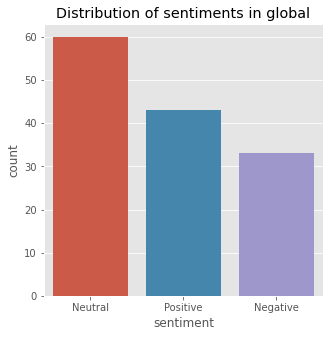

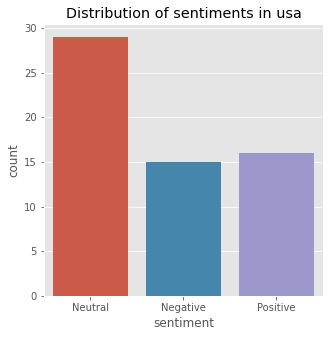

In [25]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df_global)
plt.title('Distribution of sentiments in global')

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df_usa)
plt.title('Distribution of sentiments in usa')

Text(0.5, 1.0, 'Distribution of sentiments in usa')

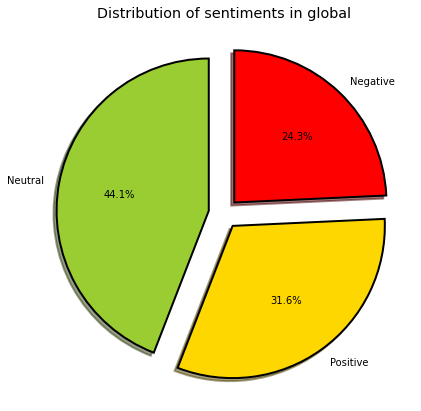

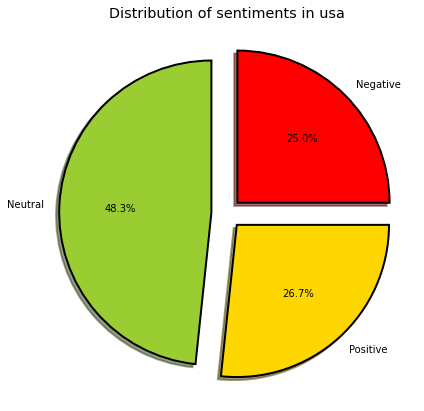

In [26]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df_global['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments in global')

fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df_usa['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments in usa')

# **Extract The Labeled Data**

In [27]:
from google.colab import files

In [ ]:
df_global.to_csv('tweet_sentiment_global.csv')
files.download('tweet_sentiment_global.csv')

In [ ]:
df_usa.to_csv('tweet_sentiment_usa.csv')
files.download('tweet_sentiment_usa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>